In [80]:
#모듈 로딩
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
from torchvision.transforms import ToTensor     #torchvision 데이터 변환 관련 모듈
from torch.utils.data import DataLoader,Dataset         #데이터셋 관련 모듈
import matplotlib.pyplot as plt

In [44]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [52]:
data1=unpickle('../data/CIFA10/data_batch_1')
data2=unpickle('../data/CIFA10/data_batch_2')
data3=unpickle('../data/CIFA10/data_batch_3')
data4=unpickle('../data/CIFA10/data_batch_4')
data5=unpickle('../data/CIFA10/data_batch_5')

data1.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [46]:
data1[b'data']

array([[ 59,  43,  50, ..., 140,  84,  72],
       [154, 126, 105, ..., 139, 142, 144],
       [255, 253, 253, ...,  83,  83,  84],
       ...,
       [ 71,  60,  74, ...,  68,  69,  68],
       [250, 254, 211, ..., 215, 255, 254],
       [ 62,  61,  60, ..., 130, 130, 131]], dtype=uint8)

In [47]:
data1[b'data'].reshape(-1,3,32,32).shape

(10000, 3, 32, 32)

In [48]:
data11=data1[b'data'].reshape(-1,3,32,32).transpose(0,2,3,1)
data11.shape

(10000, 32, 32, 3)

In [49]:
data1[b'labels']

[6,
 9,
 9,
 4,
 1,
 1,
 2,
 7,
 8,
 3,
 4,
 7,
 7,
 2,
 9,
 9,
 9,
 3,
 2,
 6,
 4,
 3,
 6,
 6,
 2,
 6,
 3,
 5,
 4,
 0,
 0,
 9,
 1,
 3,
 4,
 0,
 3,
 7,
 3,
 3,
 5,
 2,
 2,
 7,
 1,
 1,
 1,
 2,
 2,
 0,
 9,
 5,
 7,
 9,
 2,
 2,
 5,
 2,
 4,
 3,
 1,
 1,
 8,
 2,
 1,
 1,
 4,
 9,
 7,
 8,
 5,
 9,
 6,
 7,
 3,
 1,
 9,
 0,
 3,
 1,
 3,
 5,
 4,
 5,
 7,
 7,
 4,
 7,
 9,
 4,
 2,
 3,
 8,
 0,
 1,
 6,
 1,
 1,
 4,
 1,
 8,
 3,
 9,
 6,
 6,
 1,
 8,
 5,
 2,
 9,
 9,
 8,
 1,
 7,
 7,
 0,
 0,
 6,
 9,
 1,
 2,
 2,
 9,
 2,
 6,
 6,
 1,
 9,
 5,
 0,
 4,
 7,
 6,
 7,
 1,
 8,
 1,
 1,
 2,
 8,
 1,
 3,
 3,
 6,
 2,
 4,
 9,
 9,
 5,
 4,
 3,
 6,
 7,
 4,
 6,
 8,
 5,
 5,
 4,
 3,
 1,
 8,
 4,
 7,
 6,
 0,
 9,
 5,
 1,
 3,
 8,
 2,
 7,
 5,
 3,
 4,
 1,
 5,
 7,
 0,
 4,
 7,
 5,
 5,
 1,
 0,
 9,
 6,
 9,
 0,
 8,
 7,
 8,
 8,
 2,
 5,
 2,
 3,
 5,
 0,
 6,
 1,
 9,
 3,
 6,
 9,
 1,
 3,
 9,
 6,
 6,
 7,
 1,
 0,
 9,
 5,
 8,
 5,
 2,
 9,
 0,
 8,
 8,
 0,
 6,
 9,
 1,
 1,
 6,
 3,
 7,
 6,
 6,
 0,
 6,
 6,
 1,
 7,
 1,
 5,
 8,
 3,
 6,
 6,
 8,
 6,
 8,
 4,
 6,
 6,


In [50]:
label=unpickle('../data/CIFA10/batches.meta')
label.keys()

dict_keys([b'num_cases_per_batch', b'label_names', b'num_vis'])

In [51]:
label_name=label[b'label_names']
label_name

[b'airplane',
 b'automobile',
 b'bird',
 b'cat',
 b'deer',
 b'dog',
 b'frog',
 b'horse',
 b'ship',
 b'truck']

In [73]:
x_train=np.concatenate([data1[b'data'],data2[b'data'],data3[b'data'],data4[b'data'],data5[b'data']])
x_train=x_train.reshape(-1,3,32,32).transpose(0,2,3,1)
x_train.shape

(50000, 32, 32, 3)

In [74]:
y_train=np.concatenate([data1[b'labels'],data2[b'labels'],data3[b'labels'],data4[b'labels'],data5[b'labels']])
y_train

array([6, 9, 9, ..., 9, 1, 1])

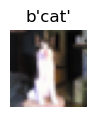

In [78]:
plt.figure(figsize=(1,1))
plt.imshow(x_train[258])
plt.title(label_name[y_train[258]])
plt.axis('off')
plt.show()

In [81]:
class make_dataset(Dataset):
    def __init__(self,feature,target):
        self.feature=feature
        self.target=target

        self.n_rows=len(feature)

    def __len__(self):
        return self.n_rows
    
    def __getitem__(self, index):
        feature_ts=torch.IntTensor(self.feature[index])
        target_ts=self.target[index]

        return feature_ts,target_ts

In [82]:
img_ds=make_dataset(x_train,y_train)

batch_size=32
epoch=1
lr=0.001

img_dl=DataLoader(img_ds,batch_size=batch_size)

In [83]:
class Img_MCF(nn.Module):

    def __init__(self):
        super().__init__()

        #모델 층 구성
        # 1. 특징 추출 층
        self.cnn_layer=nn.Sequential(
            nn.Conv2d(3,10,3),          #32-2
            nn.ReLU(),                  
            nn.MaxPool2d(2,stride=2)    #15
        )

        self.cnn_layer2=nn.Sequential(
            nn.Conv2d(10,30,3),         #15-2
            nn.ReLU(),
            nn.MaxPool2d(2,stride=2)    #6
        )

        self.cnn_layer3=nn.Sequential(
            nn.Conv2d(30,10,3),         #6-2
            nn.ReLU(),
            nn.Conv2d(10,30,3),         #4-2
            nn.ReLU(),
            nn.AvgPool2d(2,stride=2)    #1
        )

        # 2. 학습 관련 층
        self.hd_layer=nn.Linear(30,50)
        self.out_layer=nn.Linear(50,10)

    #전방향(순방향) 학습 메서드
    def forward(self,input):
        output=self.cnn_layer(input)
        print(f'[cnn layer output] {output.shape}')

        output=self.cnn_layer2(output)
        print(f'[cnn layer output] {output.shape}')

        output=self.cnn_layer3(output)
        print(f'[cnn layer output] {output.shape}')

        #4D - 2D (샘플 수, 피쳐 수)
        output=output.view(output.shape[0],-1)
        print(f'[view output] {output.shape}')

        output=F.relu(self.hd_layer(output))
        print(f'[hd layer output] {output.shape}')

        output=self.out_layer(output)
        print(f'[out layer output] {output.shape}')

        return output

In [85]:
model=Img_MCF()

criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=lr)
print(model)

Img_MCF(
  (cnn_layer): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (cnn_layer2): Sequential(
    (0): Conv2d(10, 30, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (cnn_layer3): Sequential(
    (0): Conv2d(30, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 30, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (hd_layer): Linear(in_features=30, out_features=50, bias=True)
  (out_layer): Linear(in_features=50, out_features=10, bias=True)
)


In [ ]:
class Img_MCF(nn.Module):
    #모델 구조 설계: 생성자 메서드
    def __init__(self):
        #부모 생성
        super().__init__()

        #모델 층 구성
        # 1. 특징 추출 층
        self.in_layer=nn.Conv2d(3, 10, 3)    #shape: [배치사이즈, 채널, H, W] = in [1,3,32,32], out [1,10,32,32]
        self.in_layer=nn.Conv2d(10, 50, 3)
        self.in_layer=nn.Conv2d(50, 10, 3)
        self.p_layer=nn.MaxPool2d(2,stride=2)

        # 2. 학습 관련 층
        self.hd_layer=nn.Linear(10*15*15,50)
        self.out_layer=nn.Linear(50,10)

    #전방향(순방향) 학습 메서드
    def forward(self,input):
        output=self.in_layer(input)
        print(f'[output 1] {output.shape}')

        output=F.relu(output)
        print(f'[output 2] {output.shape}')

        output=self.p_layer(output)
        print(f'[output 3] {output.shape}')

        #4D - 2D (샘플 수, 피쳐 수)
        output=output.view(output.shape[0],-1)
        print(f'[output 4] {output.shape}')

        output=F.relu(self.hd_layer(output))
        print(f'[output 5] {output.shape}')

        output=self.out_layer(output)
        print(f'[output 6] {output.shape}')

        return output